In [1]:
%matplotlib inline

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans

In [12]:
pip install scikit-plot

In [13]:
import scikitplot as skplt

In [17]:
obesity_data = pd.read_csv("data_BMI.csv")

In [18]:
obesity_data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH20,SCC,FAF,TUE,CALC,MTRANS,Nobeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [19]:
obesity_data.shape

(906, 17)

In [20]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          906 non-null    object 
 1   Age                             906 non-null    float64
 2   Height                          906 non-null    float64
 3   Weight                          906 non-null    float64
 4   family_history_with_overweight  906 non-null    object 
 5   FAVC                            906 non-null    object 
 6   FCVC                            906 non-null    float64
 7   NCP                             906 non-null    float64
 8   CAEC                            906 non-null    object 
 9   SMOKE                           906 non-null    object 
 10  CH20                            906 non-null    float64
 11  SCC                             906 non-null    object 
 12  FAF                             906 

In [21]:
def count_values(dataset, cat_variable, order = None):
    """
    Function: Counts values in each category and displays them on a plot.
    
    Parameters: Dataset, category feature, and order of appearance (order is optional).
    """
    ax = sns.countplot(x = cat_variable, data = dataset, palette = "Blues_r", order = order)
    for p in ax.patches:
        ax.annotate(f"\n{p.get_height()}", (p.get_x()+0.2, p.get_height()), 
                    ha = "center", va = "top", color = "white", size = 10)
    
    plt.title(f"Number of items in each {cat_variable} category")
    plt.show()

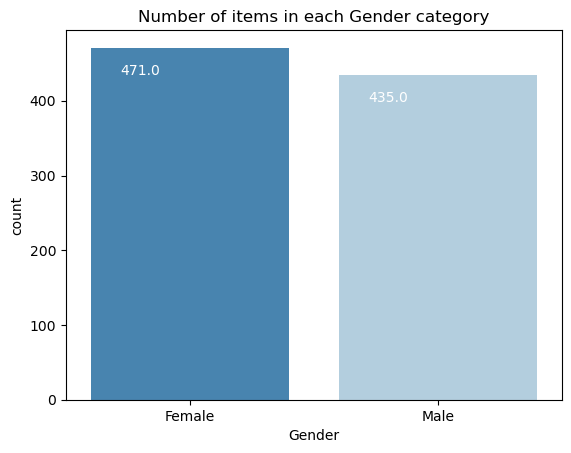

In [22]:
count_values(obesity_data, "Gender")

In [23]:
def plot_distribution(dataset, feature):
    """
    Function: Computes and displays distribution of features with continuous values; plots their mean and median.
    
    Parameters: Dataset and feature with continuous values.
    """
    plt.hist(dataset[feature], bins = "fd")
    
    plt.axvline(dataset[feature].mean(), color = "red", label = "mean")
    plt.axvline(dataset[feature].median(), color = "orange", label = "median")
    
    plt.xlabel(f"{feature}")
    plt.ylabel("Count")
    plt.legend()
    plt.title(f"Distribution of values in {feature}")
    plt.show()

In [24]:
obesity_data["Age"].describe()

count    906.000000
mean      22.292383
std        5.910373
min       14.000000
25%       18.871825
50%       21.000000
75%       23.000000
max       61.000000
Name: Age, dtype: float64

In [25]:
obesity_data["Age"].median()

21.0

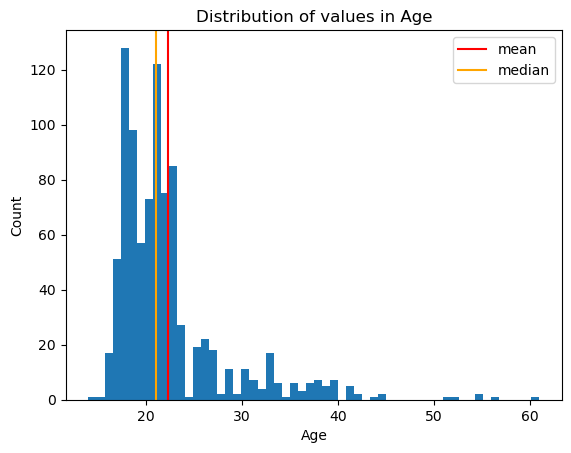

In [26]:
plot_distribution(obesity_data, "Age")

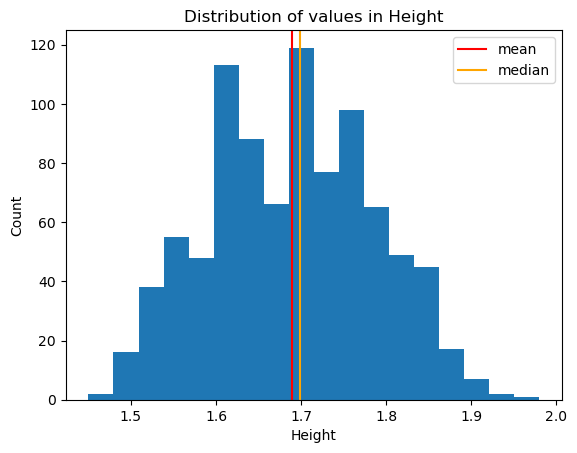

In [27]:
plot_distribution(obesity_data, "Height")

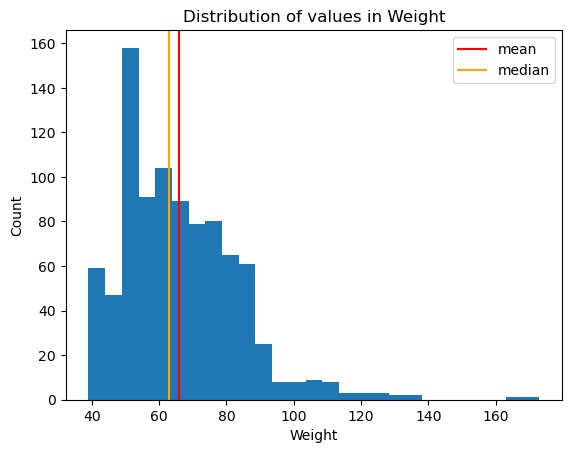

In [28]:
plot_distribution(obesity_data, "Weight")

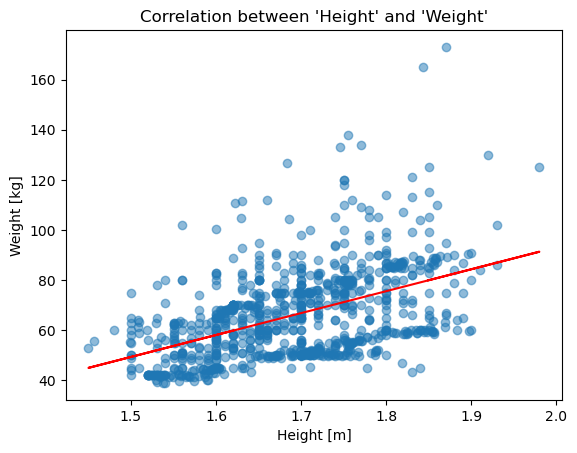

In [29]:
plt.scatter(obesity_data["Height"], obesity_data["Weight"], alpha = 0.5)
m, b = np.polyfit(obesity_data["Height"], obesity_data["Weight"], 1)
plt.plot(obesity_data["Height"], m * obesity_data["Height"] + b, color = "red")

plt.xlabel("Height [m]")
plt.ylabel("Weight [kg]")
plt.title("Correlation between 'Height' and 'Weight'")
plt.show()

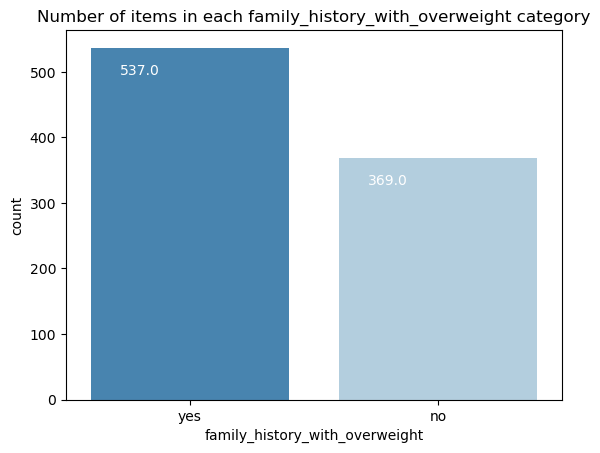

In [30]:
count_values(obesity_data, "family_history_with_overweight")

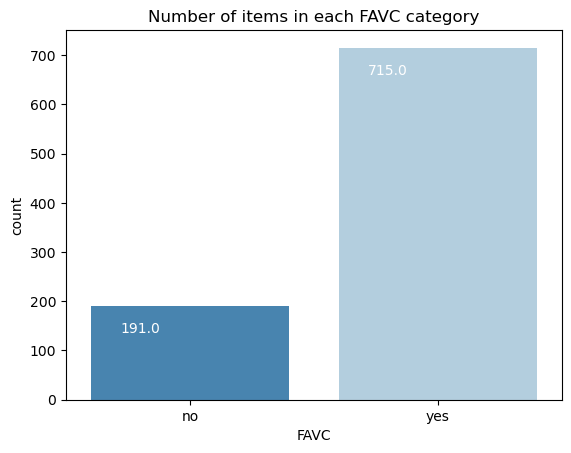

In [31]:
count_values(obesity_data, "FAVC")

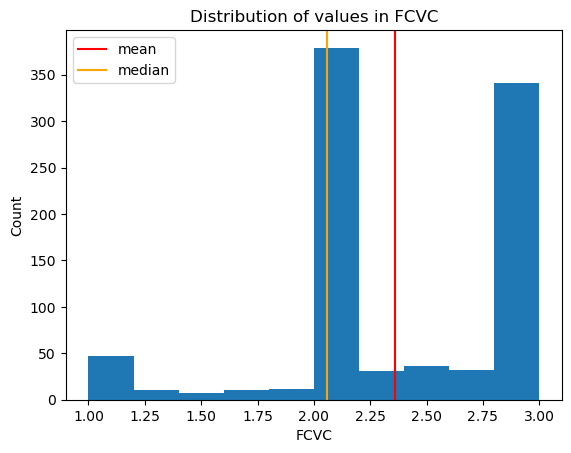

In [32]:
plot_distribution(obesity_data, "FCVC")

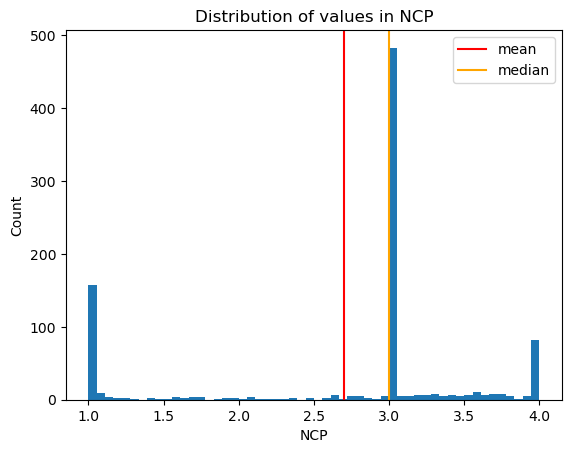

In [33]:
plot_distribution(obesity_data, "NCP")

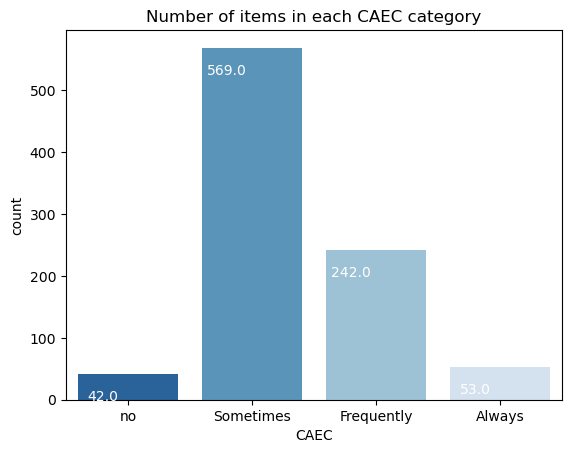

In [34]:
count_values(obesity_data, "CAEC", ["no", "Sometimes", "Frequently", "Always"])

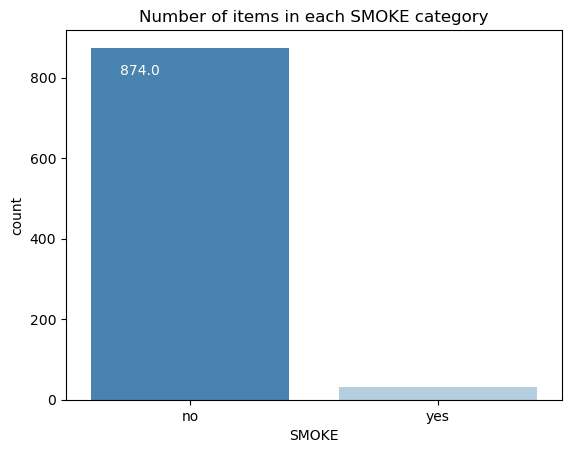

In [35]:
count_values(obesity_data, "SMOKE")

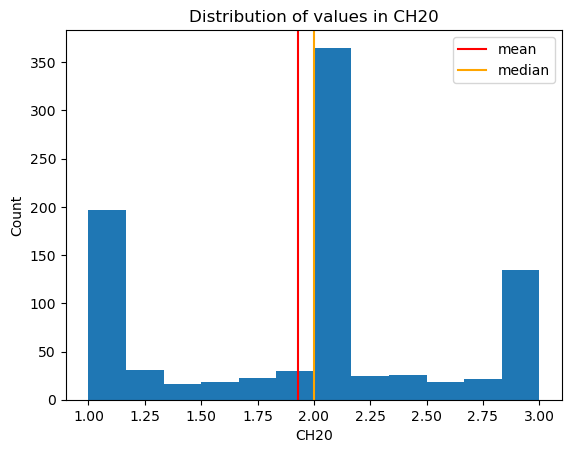

In [37]:
plot_distribution(obesity_data, "CH20")

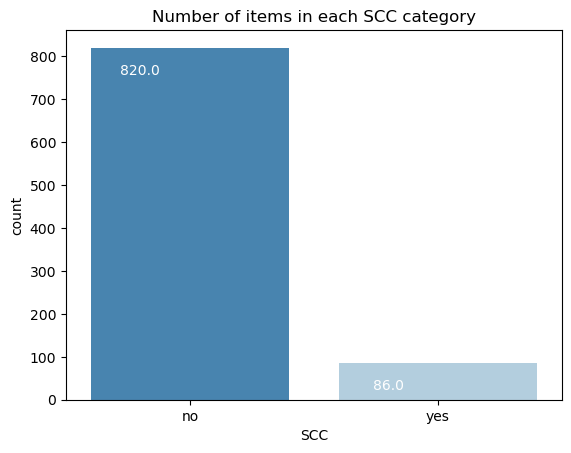

In [38]:
count_values(obesity_data, "SCC")

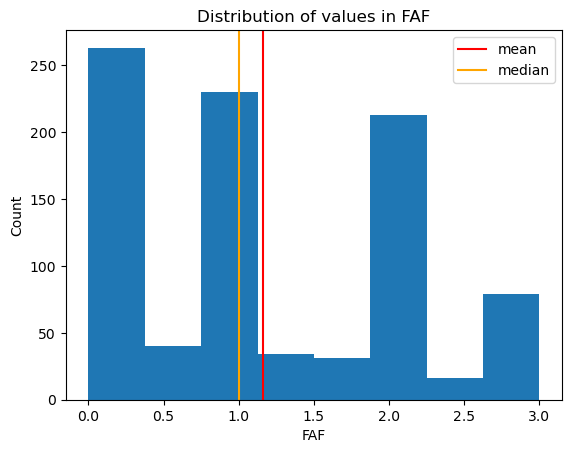

In [39]:
plot_distribution(obesity_data, "FAF")

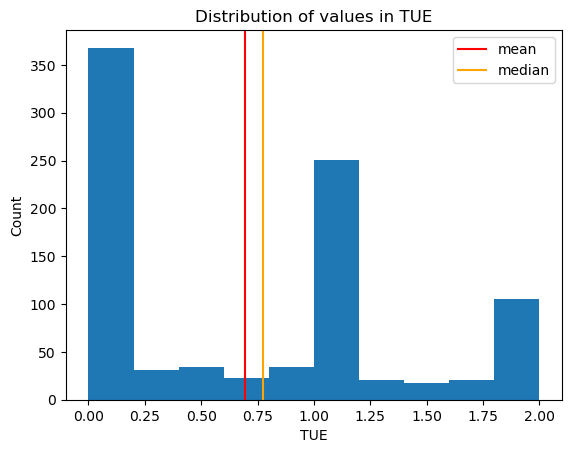

In [40]:
plot_distribution(obesity_data, "TUE")

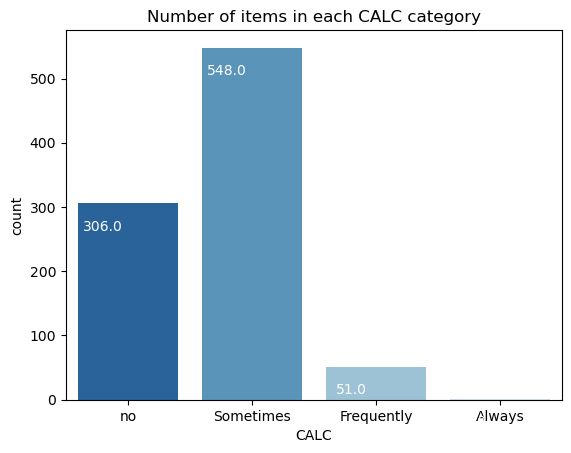

In [41]:
count_values(obesity_data, "CALC")

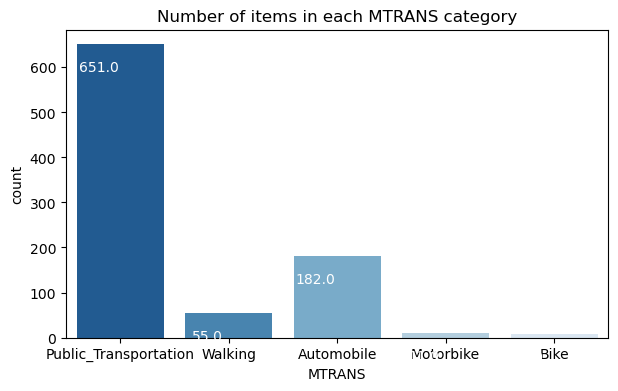

In [42]:
plt.figure(figsize = (7, 4))
count_values(obesity_data, "MTRANS")

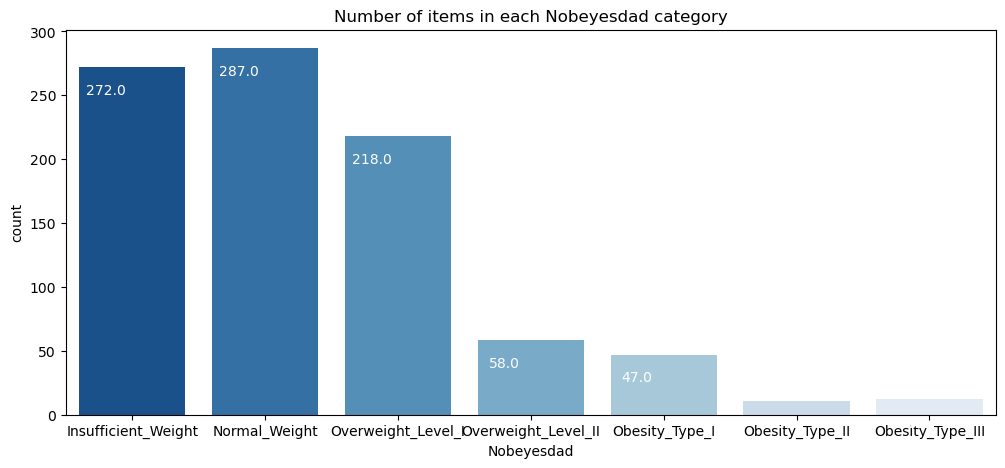

In [44]:
plt.figure(figsize = (12, 5))
count_values(obesity_data, "Nobeyesdad", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

In [45]:
def cross_plot(dataset, lead_category, sup_category, order = None):
    """
    Function: Plots interaction between two categorical variables.
    
    Parameters: Dataset, lead category, suplemental category, and order of appearance (order is optional).
    """
    
    sns.countplot(x = lead_category, hue = sup_category, data = dataset, order = order, palette = "Blues_r")
    
    plt.show()

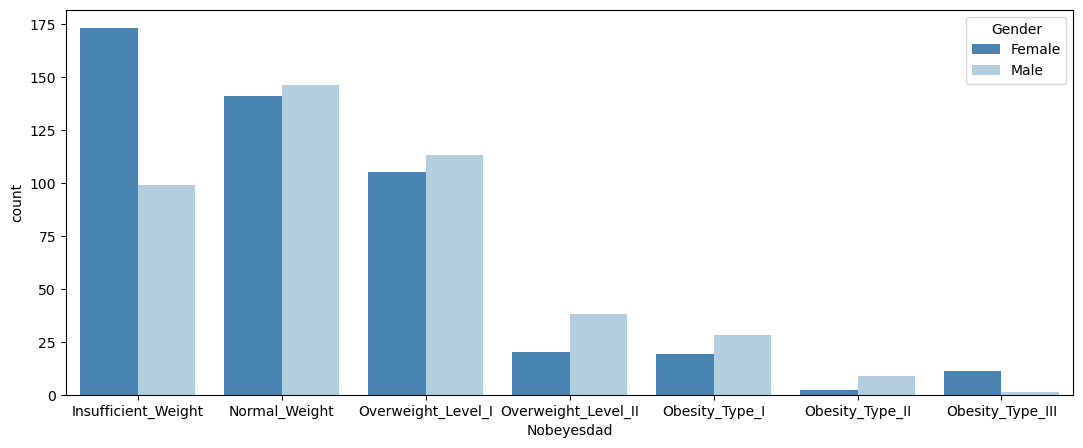

In [47]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "Nobeyesdad", "Gender", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

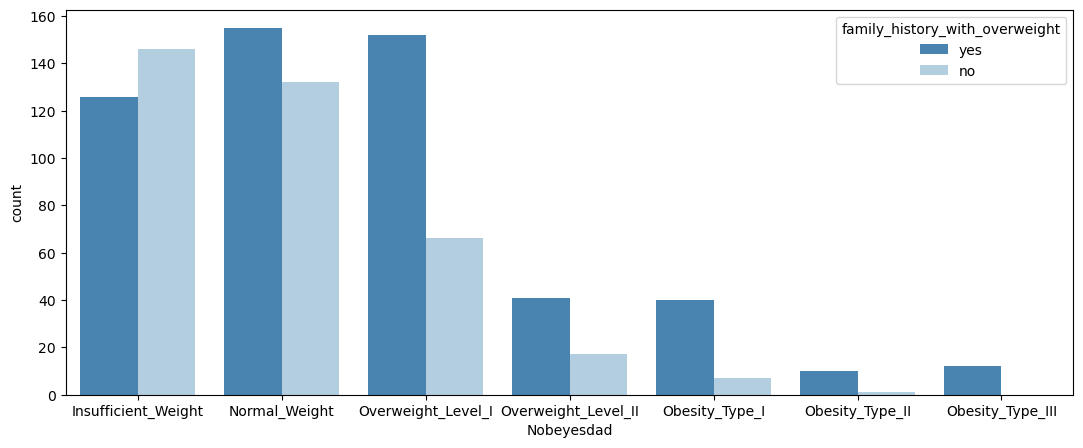

In [49]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "Nobeyesdad", "family_history_with_overweight", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

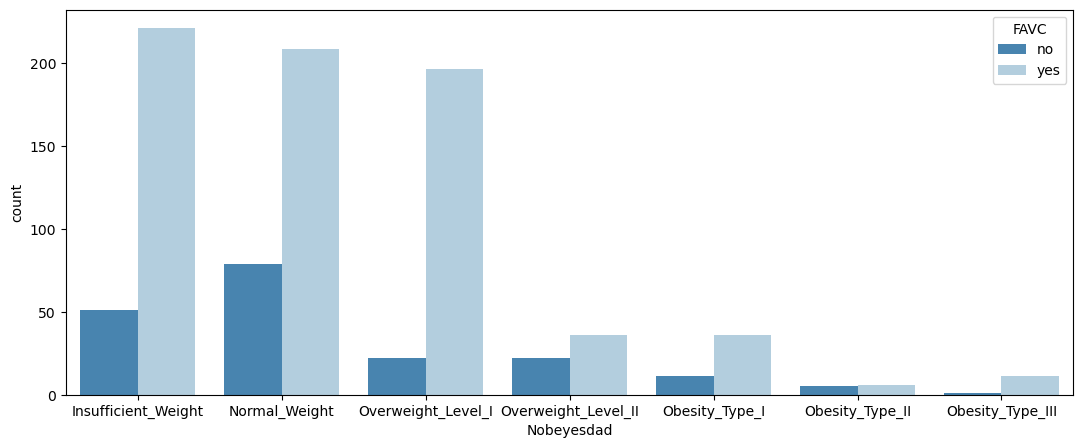

In [52]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "Nobeyesdad", "FAVC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

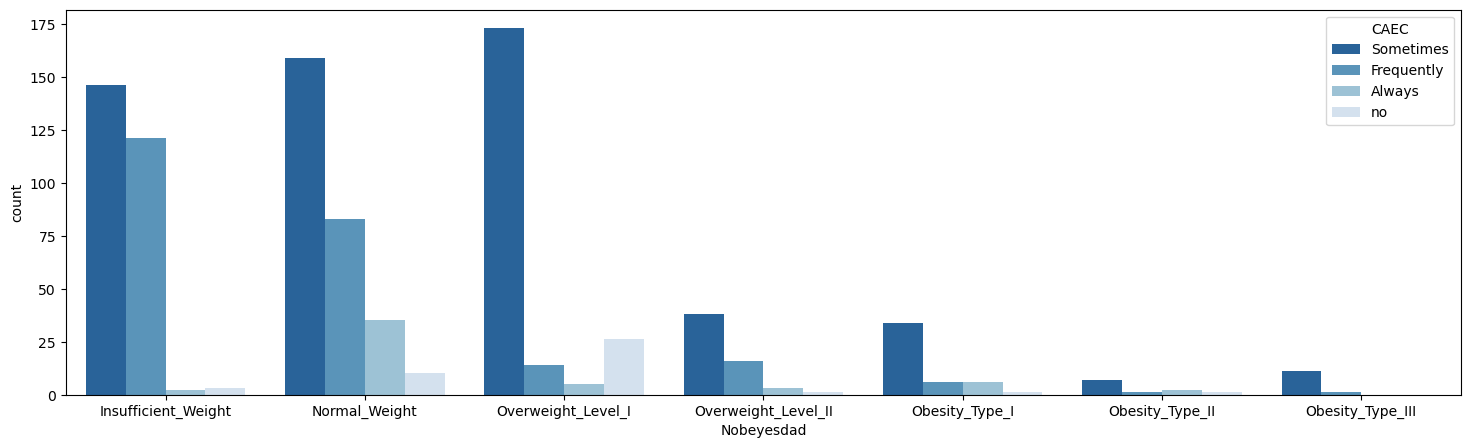

In [53]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "Nobeyesdad", "CAEC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

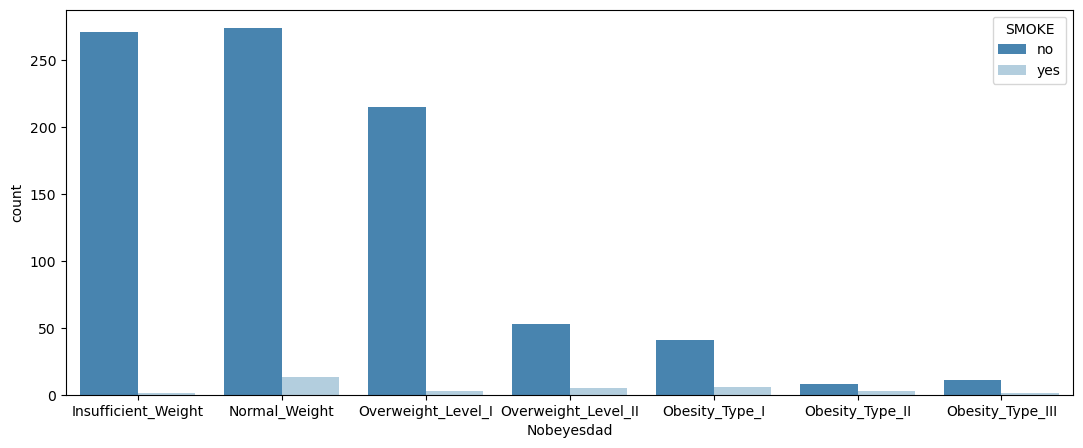

In [54]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "Nobeyesdad", "SMOKE", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

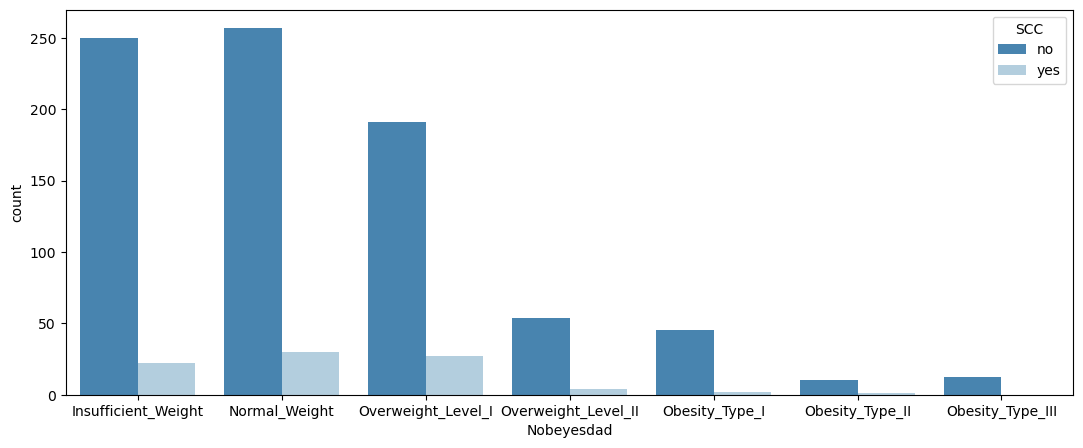

In [55]:
plt.figure(figsize = (13, 5))
cross_plot(obesity_data, "Nobeyesdad", "SCC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

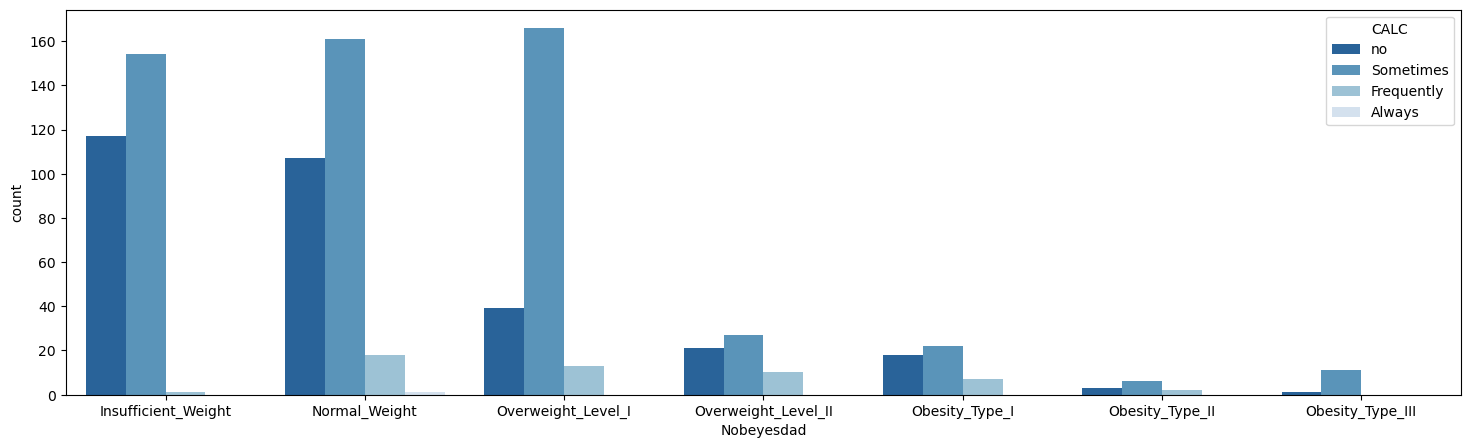

In [56]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "Nobeyesdad", "CALC", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]) 

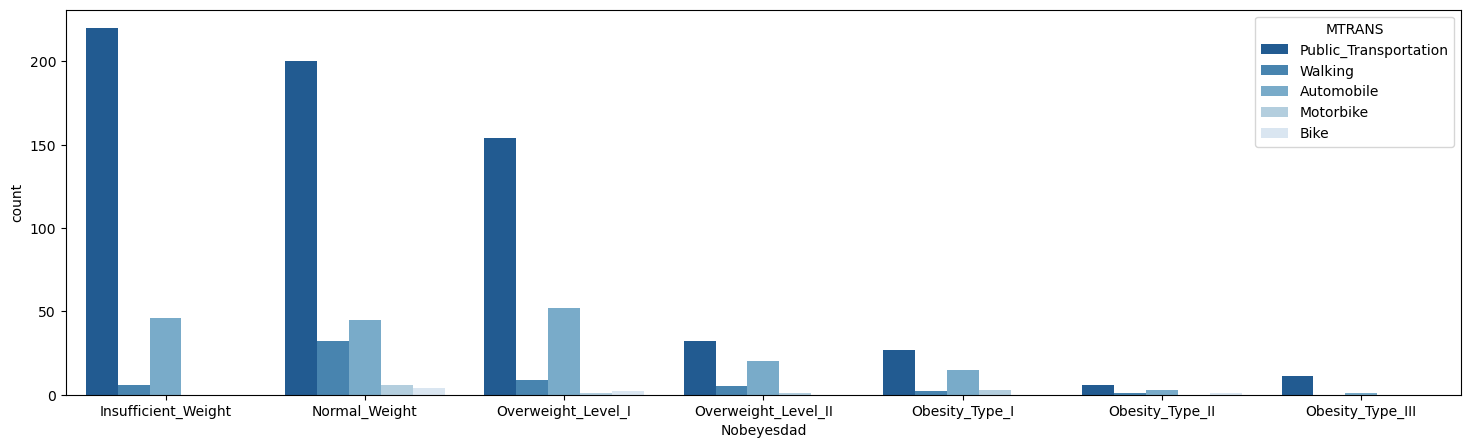

In [57]:
plt.figure(figsize = (18, 5))
cross_plot(obesity_data, "Nobeyesdad", "MTRANS", ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"])

In [58]:
obesity_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,906.0,22.292383,5.910373,14.00,18.871825,21.000000,23.000000,61.00
Height,906.0,1.689177,0.097636,1.45,1.611060,1.698630,1.756497,1.98
Weight,906.0,65.904858,17.587699,39.00,51.716167,63.005823,75.950645,173.00
FCVC,906.0,2.359680,0.571166,1.00,2.000000,2.056035,3.000000,3.00
NCP,906.0,2.699161,0.929389,1.00,2.728152,3.000000,3.000000,4.00
CH20,906.0,1.931678,0.641457,1.00,1.327229,2.000000,2.155083,3.00
FAF,906.0,1.163642,0.942538,0.00,0.116548,1.000000,2.000000,3.00
TUE,906.0,0.693135,0.682263,0.00,0.000000,0.774922,1.000000,2.00


In [60]:
obesity_numeric = obesity_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH20", "FAF", "TUE"]]

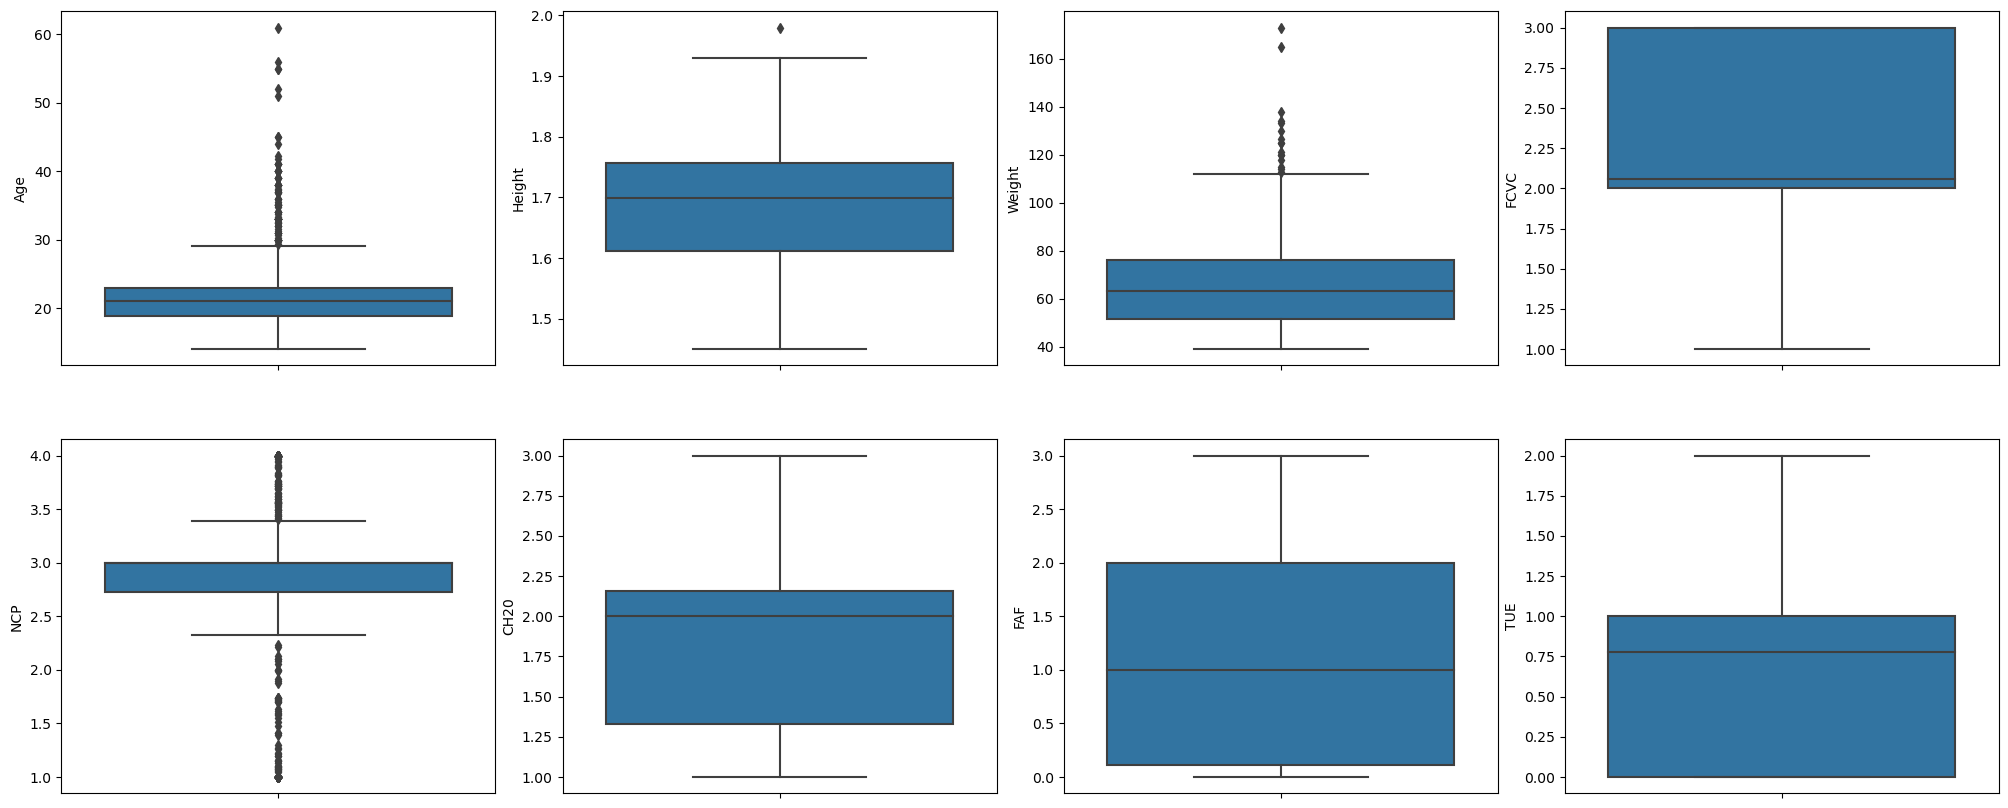

In [61]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (20, 8))
# fig.delaxes(axs[1][3])
idx = 0
axs = axs.flatten()
for k, v in obesity_numeric.items():
    sns.boxplot(y = k, data = obesity_numeric, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

C:\Users\Mr. Nartey\AppData\Local\Temp\ipykernel_13060\669674420.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(obesity_data.corr(),


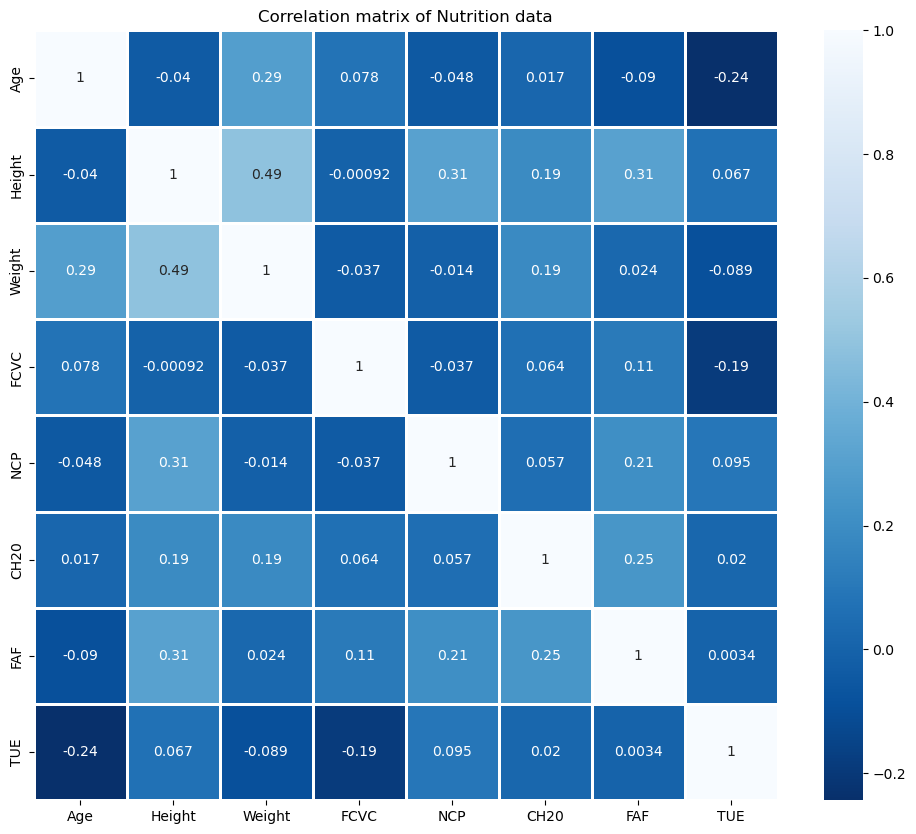

In [63]:
plt.figure(figsize = (12, 10))
sns.heatmap(obesity_data.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2, 
           linecolor = "white")
plt.title("Correlation matrix of Nutrition data")
plt.show()

In [64]:
obesity_dummies = pd.get_dummies(obesity_data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])

In [66]:
obesity_lab = obesity_data[["Nobeyesdad"]]

In [67]:
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)

In [68]:
obesity_concatenated.head()

,Age,Height,Weight,FCVC,NCP,CH20,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Nobeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,1,0,0,0,1,0,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,1,0,0,0,0,0,1,0,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,Overweight_Level_II


In [70]:
obesity_label = obesity_concatenated["Nobeyesdad"]
obesity_features = obesity_concatenated.drop("Nobeyesdad", axis = 1)

In [71]:
obesity_label

0            Normal_Weight
1            Normal_Weight
2            Normal_Weight
3       Overweight_Level_I
4      Overweight_Level_II
              ...         
901     Overweight_Level_I
902     Overweight_Level_I
903     Overweight_Level_I
904     Overweight_Level_I
905                   Over
Name: Nobeyesdad, Length: 906, dtype: object

In [72]:
obesity_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 906 non-null    float64
 1   Height                              906 non-null    float64
 2   Weight                              906 non-null    float64
 3   FCVC                                906 non-null    float64
 4   NCP                                 906 non-null    float64
 5   CH20                                906 non-null    float64
 6   FAF                                 906 non-null    float64
 7   TUE                                 906 non-null    float64
 8   Gender_Female                       906 non-null    uint8  
 9   Gender_Male                         906 non-null    uint8  
 10  family_history_with_overweight_no   906 non-null    uint8  
 11  family_history_with_overweight_yes  906 non-n

In [73]:
obesity_features = obesity_features.astype("float")

In [74]:
obesity_features.dtypes

Age                                   float64
Height                                float64
Weight                                float64
FCVC                                  float64
NCP                                   float64
CH20                                  float64
FAF                                   float64
TUE                                   float64
Gender_Female                         float64
Gender_Male                           float64
family_history_with_overweight_no     float64
family_history_with_overweight_yes    float64
FAVC_no                               float64
FAVC_yes                              float64
CAEC_Always                           float64
CAEC_Frequently                       float64
CAEC_Sometimes                        float64
CAEC_no                               float64
SMOKE_no                              float64
SMOKE_yes                             float64
SCC_no                                float64
SCC_yes                           

In [75]:
obesity_features_scaled = MinMaxScaler().fit_transform(obesity_features)


In [76]:
obesity_features_scaled.min(axis = 1), obesity_features_scaled.max(axis = 1)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [77]:
#Encode lables

In [79]:
encoder = LabelEncoder()

In [80]:
encoder.fit(obesity_label)

LabelEncoder()

In [81]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Over',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [82]:
obesity_labels_encoded = encoder.transform(obesity_label)

In [83]:
obesity_labels_encoded

array([1, 1, 1, 6, 7, 1, 1, 1, 1, 1, 2, 7, 1, 2, 1, 1, 7, 2, 7, 6, 7, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 6, 7, 1, 7, 1, 7, 1, 1, 1, 7, 6, 1, 1, 1,
       1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 6,
       7, 2, 3, 1, 7, 0, 1, 1, 7, 0, 0, 7, 2, 1, 1, 7, 2, 0, 7, 1, 1, 6,
       1, 7, 3, 1, 6, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 6, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 7, 1, 7, 6, 7, 0, 1, 7, 6, 1, 1, 1, 7, 1, 1,
       1, 1, 2, 6, 1, 2, 1, 1, 0, 1, 2, 6, 6, 6, 1, 2, 1, 2, 1, 1, 6, 7,
       2, 1, 1, 1, 6, 7, 1, 7, 1, 1, 7, 3, 1, 7, 6, 7, 7, 1, 1, 1, 6, 1,
       1, 1, 1, 6, 1, 1, 0, 7, 6, 6, 2, 2, 2, 1, 1, 6, 6, 1, 2, 6, 1, 3,
       0, 1, 2, 2, 4, 2, 1, 2, 2, 1, 1, 1, 3, 1, 7, 1, 1, 1, 1, 6, 1, 6,
       6, 7, 1, 1, 2, 3, 1, 1, 7, 3, 6, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 6,
       1, 7, 1, 0, 1, 1, 1, 6, 7, 7, 7, 1, 1, 6, 7, 2, 7, 2, 6, 6, 1, 0,
       1, 0, 0, 7, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 6, 1, 6, 1,

In [84]:
obesity_features_tr, obesity_features_ts, obesity_labels_tr, obesity_labels_ts = train_test_split(
                obesity_features, obesity_labels_encoded, 
                test_size = 0.2, stratify = obesity_labels_encoded,
                random_state = 42) # shuffle=True

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [85]:
obesity_features_tr.shape, obesity_labels_tr.shape, obesity_features_ts.shape, obesity_labels_ts.shape

NameError: name 'obesity_features_tr' is not defined